### Observation by using diachrony:

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import sinr.graph_embeddings as ge
import sinr.text.evaluate as ev
import sinr.text.diachrony as dia
import numpy as np

In [3]:
# load of 2 transferred and aligned models ( by preference, use the same big reference model for both transfers )
model_1940 = ge.SINrVectors("./1940_transferspars")
model_1950 = ge.SINrVectors("./1950_transferspars")
model_1940.load()
model_1950.load()

/info/etu/m1/s2100574/miniconda3/envs/devdiachro/lib/python3.10/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator NearestNeighbors from version 1.6.1 when using version 1.7.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
print(f"1940 vocab size: {len(model_1940.vocab)}")
print(f"1950 vocab size: {len(model_1950.vocab)}")

1940 vocab size: 19632
1950 vocab size: 20106


In [5]:
diachro = dia.Diachronic(model_1940, model_1950)

In [21]:
# Cosine similarity (in a single model)
similarity1 = dia.Diachronic.cosine_similarity(model_1940, "gay", "happy")
similarity2 = dia.Diachronic.cosine_similarity(model_1950, "gay", "happy")
print(f"Cosine similarity between 'gay' and 'happy' in 1940: {similarity1:.4f}")
print(f"Cosine similarity between 'gay' and 'happy' in 1950: {similarity2:.4f}")

Cosine similarity between 'woman' and 'man' in 1940: 0.6981


In [38]:
# Change vector (v_1950 - v_1940)
diff_vec = diachro.difference_vector("gay")
print("vecteur de changement :", diff_vec)
if diff_vec is not None:
    print(f"Norm of 'gay' change vector from 1940 to 1950: {np.linalg.norm(diff_vec):.4f}")
else:
    print("Word not found or dimension mismatch.")

vecteur de changement : [0. 0. 0. ... 0. 0. 0.]
Norm of 'gay' change vector from 1940 to 1950: 0.0569


In [33]:
words_to_check = ["woman", "man", "technology", "war", "freedom"]
change_norms = diachro.compute_change_norms(words_to_check)

Computing change norms: 100%|██████████| 5/5 [00:00<00:00, 678.69it/s]


In [34]:
# Display top changes
for word, norm in list(change_norms.items()):
    print(f"{word}: {norm:.4f}" if norm is not None else f"{word}: not found")

war: 0.0706
technology: 0.0547
man: 0.0438
woman: 0.0370
freedom: 0.0321


In [41]:
# Get all change vectors (for intersection vocab) or for a specific subset
change_vectors = diachro.get_change_vectors(["woman", "man", "freedom", "gay"])
for w, vec in change_vectors.items():
    if vec is not None:
        print(f"{w}: change vector norm = {np.linalg.norm(vec):.4f}")
    else:
        print(f"{w}: not found in both models")

woman: change vector norm = 0.0370
man: change vector norm = 0.0438
freedom: change vector norm = 0.0321
gay: change vector norm = 0.0569


In [14]:
vecs = diachro.get_change_vectors(words_to_check)
words, matrix = diachro.compute_similarity_matrix(vecs)

# Display similarity matrix
if len(words) > 0:
    print("Words:", words)
    print("Similarity matrix:\n", np.round(matrix, 2))
else:
    print("No valid vectors to compute similarity.")

Words: ['woman', 'man', 'technology', 'war', 'freedom', 'gay']
Similarity matrix:
 [[ 1.   -0.24 -0.01  0.13  0.07 -0.23]
 [-0.24  1.    0.06 -0.07 -0.07  0.27]
 [-0.01  0.06  1.    0.07 -0.08 -0.07]
 [ 0.13 -0.07  0.07  1.    0.06 -0.01]
 [ 0.07 -0.07 -0.08  0.06  1.   -0.05]
 [-0.23  0.27 -0.07 -0.01 -0.05  1.  ]]


Computing change norms: 100%|██████████| 19632/19632 [00:16<00:00, 1186.13it/s]


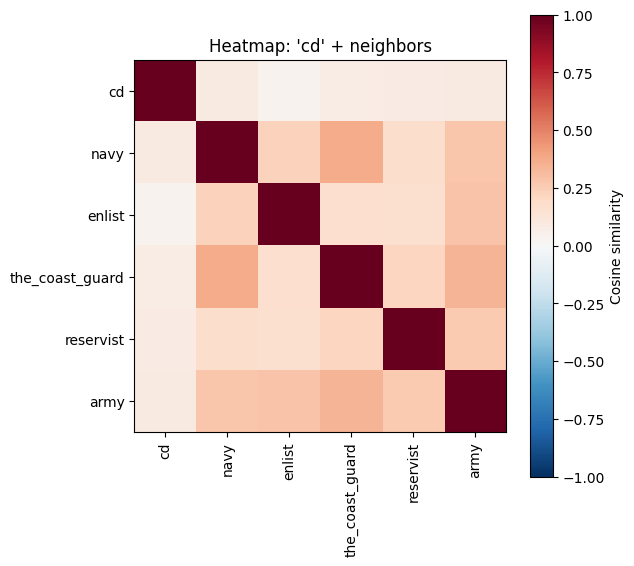

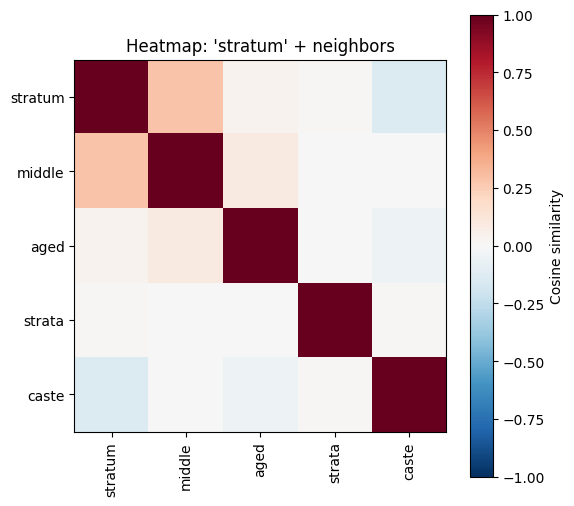

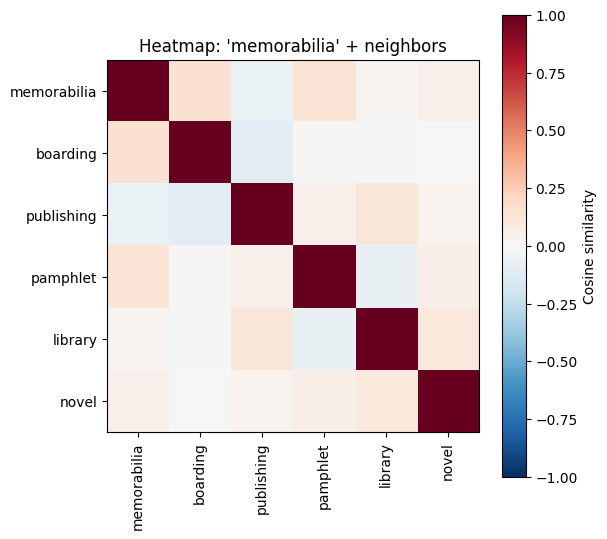

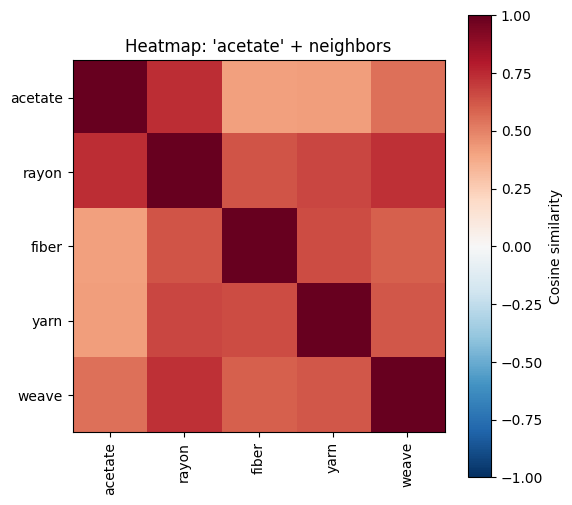

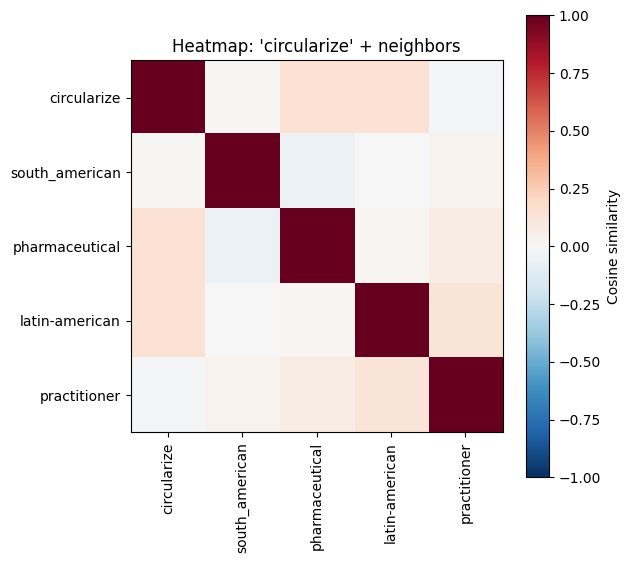

In [18]:
# Heatmaps for the top-k most changed words and their neighbors
diachro.plot_topk_similarity_matrix(model_1940, topk=5, file_name="dia_heatmap")